In [1]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [1]:
#Data processing packages
import pandas as pd
import numpy as np


#Visualization packages
import matplotlib.pyplot as plt

#NLP packages
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

In [2]:
comm = pd.read_csv('cleaned_data.csv',encoding='utf8',error_bad_lines=False);

In [3]:
comm.head()

,Author,Comment
0,Don Gillies,Nothing better than being young and in love. ...
1,Dogeball,this song. . .
2,Varifiable Jelly,5 years and it ain t stopped. Dang
3,0,there is literally nobody in this world who do...
4,Nirmala Gowda,Me I 39


In [4]:
comm.shape

(16333, 2)

In [5]:
#calculate sentiment polarity
pol=[]
numberErrors = 0
for i in comm['Comment']:
    try:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    except:
        numberErrors +=1
        pol.append(0)

In [6]:
#adding polarity column
comm['Polarity']=pol

In [7]:
#number of errors that could not be analyzed by textBlob
print("Number of errors: ",numberErrors)

Number of errors:  327


In [10]:
#converting polarity values from contionous to catagorical
comm['Polarity'][comm.Polarity==0]= 0
comm['Polarity'][comm.Polarity>0]= 1
comm['Polarity'][comm.Polarity<0]= -1

In [11]:
#visulizing positive comments
df_positive = comm[comm.Polarity==1]
df_positive.head()

,Author,Comment,Polarity
0,Don Gillies,Nothing better than being young and in love. ...,1.0
11,.teef5211.,Was a great song,1.0
14,DarkMoonGeneral,Funny thing about how I heard this song. I did...,1.0
15,si yuan wanglow,follow us lmao,1.0
20,GN LEARNING,Love you mother red heartred heart,1.0


In [12]:
#visulizing negative comments
df_negative = comm[comm.Polarity==-1]
df_negative.head()

,Author,Comment,Polarity
7,cyh 7,Holy shit spotter from isle,-1.0
50,Ojus Sharma,jeffery harber why do you waste your time and...,-1.0
115,Crazy Gaming,Fuck you all hater of Sheeran,-1.0
116,0,"There s one bad thing about this song, it ends",-1.0
168,Wayne YouTube,Dating a girl who gyms and does boxing is so s...,-1.0


In [14]:
#vizualizing neutral comments
df_neutral = comm[comm.Polarity==0]
df_neutral.head()

,Author,Comment,Polarity
1,Dogeball,this song. . .,0.0
2,Varifiable Jelly,5 years and it ain t stopped. Dang,0.0
3,0,there is literally nobody in this world who do...,0.0
4,Nirmala Gowda,Me I 39,0.0
5,PRO FF,Evergreen Justinfire,0.0


 0.0    10865
 1.0     4609
-1.0      859
Name: Polarity, dtype: int64

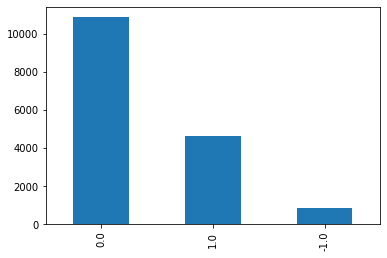

In [15]:
#Visulizing the distribution of comments
comm.Polarity.value_counts().plot.bar()
comm.Polarity.value_counts()

In [17]:
'''
1.The triend of  more neutral comments is observed , this may be due to the fact that the song is 5 years old 
and most people are just commenting about time and how many views it still has. We can also observe that 
there are 327 comments could not be analized by textBlob that are kept in this group.Some comments are in different
languages that could not be understood by textBlob are also kept in this group

2.The triend of positive comments as high can be explained by the fact that this song is one of the most loved 
english songs of this decade. The number of positive comments is almost 5 times the negative comments.
'''

'\n1.The triend of  more neutral comments is observed , this may be due to the fact that the song is 5 years old \nand most people are just commenting about time and how many views it still has. We can also observe that \nthere are 327 comments could not be analized by textBlob that are kept in this group.Some comments are in different\nlanguages that could not be understood by textBlob are also kept in this group\n\n2.The triend of positive comments as high can be explained by the fact that this song is one of the most loved \nenglish songs of this decade. The number of positive comments is almost 5 times the negative comments.\n'

In [18]:
#Visualizing the main dataframe with its new column of sentimental labels
comm.head(10)

,Author,Comment,Polarity
0,Don Gillies,Nothing better than being young and in love. ...,1.0
1,Dogeball,this song. . .,0.0
2,Varifiable Jelly,5 years and it ain t stopped. Dang,0.0
3,0,there is literally nobody in this world who do...,0.0
4,Nirmala Gowda,Me I 39,0.0
5,PRO FF,Evergreen Justinfire,0.0
6,Karna Debbarma,Op song headphone smiling face with heart eyes,0.0
7,cyh 7,Holy shit spotter from isle,-1.0
8,08 Farhat Ferdiansyah X MIPA 4,Keren banggg,0.0
9,Angel Khoo,Semoga komentar ini masih bisa di lihat untuk ...,0.0


In [21]:
comm.to_csv('labelled_data.csv',index=False)